# Data Preprocessing Template

## Importing the libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [59]:
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [60]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


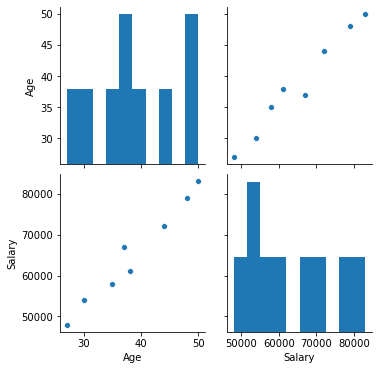

In [61]:
sns.pairplot(dataset)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [63]:
dataset.shape

(10, 4)

In [64]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [65]:
X = dataset.iloc[:, :-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [66]:
y = dataset.iloc[:, -1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## Handle the missing data 

In [67]:
# Replacing NAN value from mean 

In [68]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])

In [69]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encoding Independent variable (categorical data)

In [70]:
'''In this dataset we have Country column as categorical data, we have 3 country France , Spain and Germany
   * We can use one hot encoding
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [72]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encoding Dependent variable (labeled data i.e. Yes/No)

In [73]:
from sklearn.preprocessing import LabelEncoder
labelEncode=LabelEncoder()
y=labelEncode.fit_transform(y)

In [74]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset into the Training set and Test set

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [76]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [77]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [78]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [79]:
y_test

array([0, 1])

### Feature scaling

In [80]:
## Import question : When to perform feature scaling before spliting the dataset or after the spliting

## Answer : After spliting 

## Standisaiton should not be applied to dumy variable(onehot encoding) because they are all in range

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])

#We will transform the test dataset wrt scaler we got from above step

X_test[:,3:]=sc.transform(X_test[:,3:])

In [81]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [82]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)

## Training the data set 

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()